# Personal Loan Campaign Project

## Objective
AllLife Bank is a US Bank with mostly liability customers (depositors) with varying sizes of deposits. The bank is interested in expanding borrowers (asset customers).<br/>
The aim for this project is to build a model for AllLife Bank that will help the bank to identify the potential customers who have a higher probability of purchasing the loan.<br/>
This Model will be used to
* To predict whether a liability customer will buy a personal loan or not.
* To identify which variables are most significant.
* And to suggest which segment of customers should be targeted more.

## Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
# Course: Supervised Learning: Classification
# Project: Personal Loan Campaign Project 
# Student: Sameer Girolkar
# Date: Nov 10, 2021

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

## Initial setup
Let's start by importing the required libraries, setting up some basic configs for EDA.<br/>
We will also writ some basic functions to help us visualize the data.

In [3]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build LogisticRegression model
from sklearn.linear_model import LogisticRegression

# to build decisionTree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

from uszipcode import SearchEngine

<IPython.core.display.Javascript object>

In [1]:
# function to plot histogram and barplot together
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")


# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None, hue=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    hue: Grouping variable
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        hue=hue,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


def box_plot_by_cat(data, category_col, y, n=None):
    count = data[category_col].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    sns.boxplot(
        x=category_col,
        y=y,
        data=data,
        order=data[category_col].value_counts().index[:n].sort_values(),
    )
    plt.xticks(rotation=90)
    plt.show()


# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None, hue=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        hue=hue,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 75)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [5]:
# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

In [6]:
# make the graphs look nicer
sns.set(color_codes=True)
sns.set_style("darkgrid")
# light palette for Pivot tables
cm = sns.light_palette("lightblue", as_cmap=True)
sns.set(
    rc={
        "figure.figsize": (15, 15),
        "axes.titlesize": "30",
        "xtick.labelsize": "20",
        "ytick.labelsize": "20",
    }
)

# actually display the graphs instead of generating only the object
%matplotlib inline

<IPython.core.display.Javascript object>

# EDA
Let's now read and observe the data

In [7]:
# Read the data from the file
cmp_df = pd.read_csv("Loan_Modelling.csv")
# lets see how many rows and columns are present in the data
cmp_df.shape

(5000, 14)

<IPython.core.display.Javascript object>

In [8]:
# Let's see what type of data do we have and are there any nulls
cmp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

In [9]:
# Lets take a look at the basic stats for the data
cmp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

In [10]:
cmp_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [11]:
cmp_df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

In [12]:
# lets see if there are any duplicates
cmp_df[cmp_df.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

## Observations
* All the columns are treated as numeric columns
* min value for experience is -ve. We will have to treat it correctly or drop the -ve values
* There are no nulls
* There are no duplicates

## Univariet Analysis
As observed all the columns are numeric. Let's take a look one by one and decide if any of the columns need treatment.

#### ID Column
ID column does not contribute any information. Lets drop it

In [13]:
cmp_df.drop("ID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Age Column
Lets take a look at the distribution of the Age

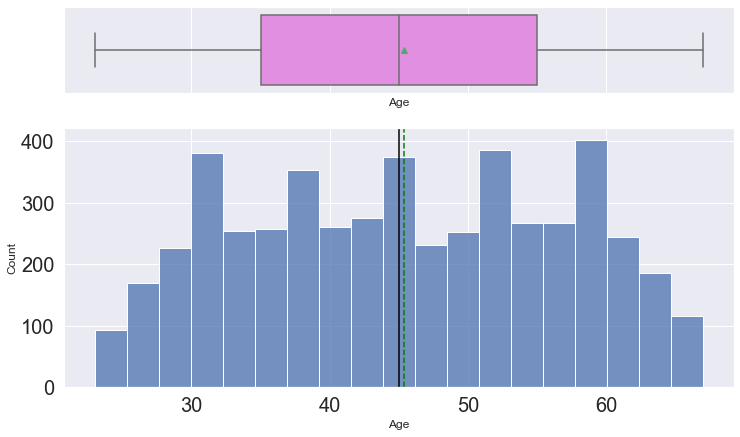

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(cmp_df, "Age")

##### Observations
* Age is uniformly distributed
* There are no outliers

#### Experience column
There are some -ve values in the Experience column. Those are clearly wrong. Let's drop those

In [15]:
cmp_df = cmp_df[cmp_df["Experience"] >= 0]

<IPython.core.display.Javascript object>

let's take a look at the distribution of Experience

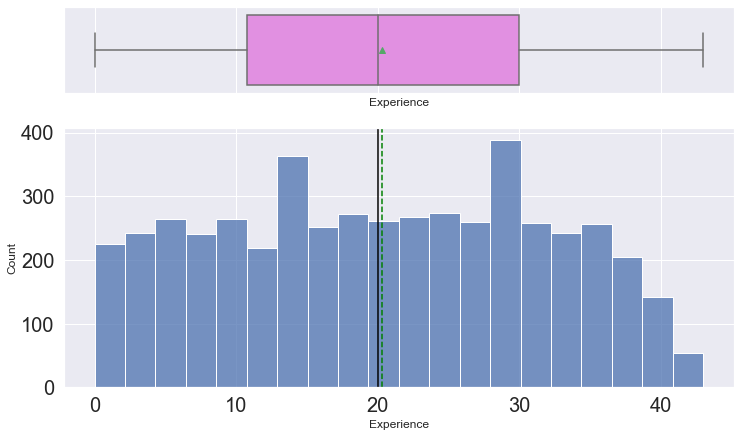

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(cmp_df, "Experience")

##### Observations
* Experience too is uniformly distributed
* There are no outliers in experience

#### Income column

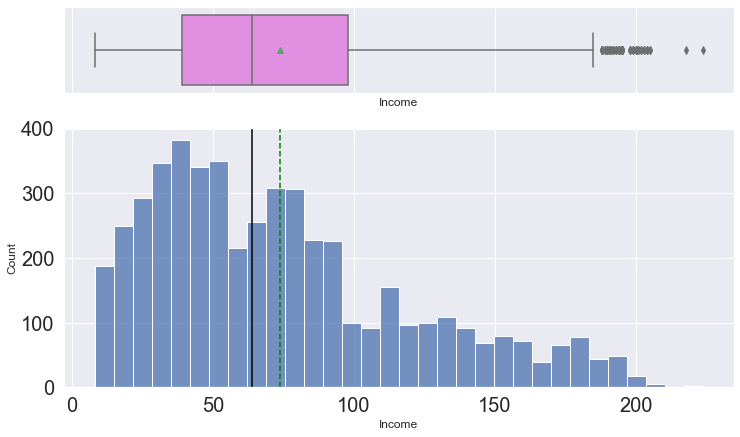

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(cmp_df, "Income")

##### Observations
* Income data is right skewed
* There are some outliers in Income

#### ZIPcode column.
Lets take a look at the ZIPCode data and ensure that the zipcodes are valid US zipcodes.<br/>
Lets drop the rows with invalid zipcodes<br/>
uszipcode library can provide the county. Let's use this to convert zipcodes to counties

In [18]:
# convert ZIPCode column to string
cmp_df["ZIPCode"] = cmp_df["ZIPCode"].astype(str)

# create zipcode search engine
search = SearchEngine(simple_zipcode=True)

# function to check valid zipcode
def is_valid_zipcode(zipcode):
    zipcode = search.by_zipcode(zipcode)
    return zipcode.zipcode is not None


# function to return county
def get_county(zipcode):
    zipcode = search.by_zipcode(zipcode)
    return zipcode.county.replace(" County", "")


# Function to get median household income for a zipcode
def get_median_household_income(zipcode):
    zipcode = search.by_zipcode(zipcode)
    med_inc = zipcode.median_household_income
    if med_inc is not None:
        return round(med_inc / 1000, 3)
    else:
        return np.nan


# Note the shape of the dataframe before doropping rows with invalid zipcodes
cmp_df.shape

(4948, 13)

<IPython.core.display.Javascript object>

In [19]:
# Keep only the rows with valid zipcodes
cmp_df = cmp_df[cmp_df["ZIPCode"].map(is_valid_zipcode)]
# check the shape after dropping invalid zipcodes
cmp_df.shape

(4915, 13)

<IPython.core.display.Javascript object>

33 rows had invalid zipcodes. Those rows were dropped.

In [20]:
# add the column for county
cmp_df["County"] = cmp_df["ZIPCode"].map(get_county)

<IPython.core.display.Javascript object>

In [21]:
len(cmp_df["County"].unique())

38

<IPython.core.display.Javascript object>

Certain counties have more number of customers and those counties also have more customers who accepted the personal loan. 

In [22]:
# Drop ZIPCode
cmp_df.drop("ZIPCode", axis=1, inplace=True)

<IPython.core.display.Javascript object>

##### Observations:
* 33 rows had invalid ZIPCodes and were dropped.
* Converting Zipcodes to Counties helped in reducing the unique values

#### CCAVG column
Lets take a look at the distribution for the CCAvg column

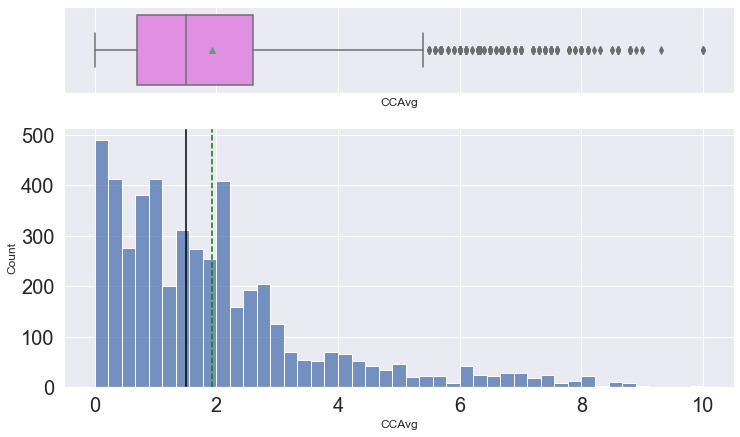

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(cmp_df, "CCAvg")

##### Observations:
* CCAvg values are right skewed
* There are some outliers in CCAvg

#### Mortgage Column

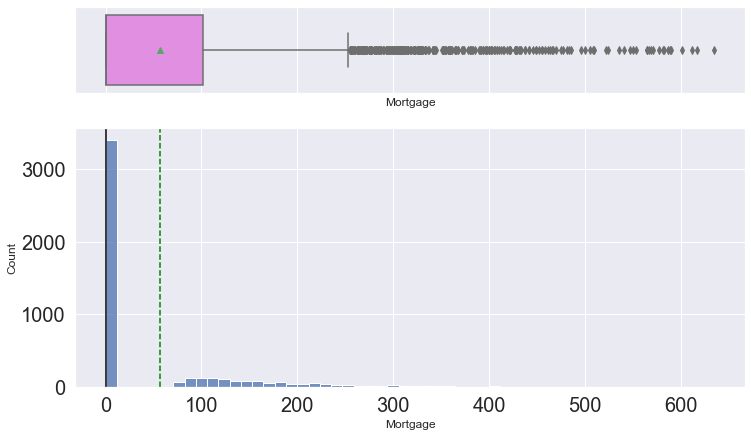

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(cmp_df, "Mortgage")

Most of the customers do not have mortgage<br/>
Lets take a look at only the customers who have mortgage.

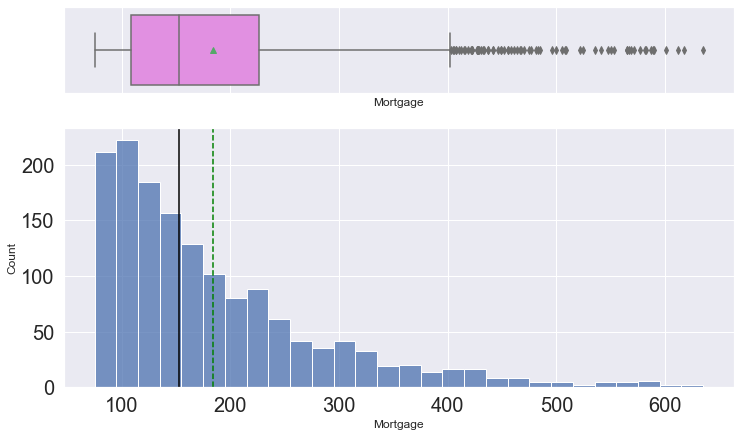

<IPython.core.display.Javascript object>

In [25]:
# Only the customers who have mortgages
histogram_boxplot(cmp_df[cmp_df["Mortgage"] > 0], "Mortgage")

##### Observations:
* Most customers do not have Mortgage
* Of the customers who have mortgage, most have less than 200K in mortgage

#### Personal_loan column
Personal_loan is our target column. Let's look at it.

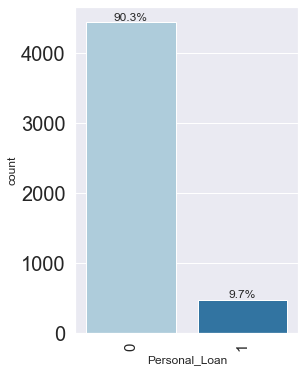

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(cmp_df, "Personal_Loan", perc=True)

Less than 10% customers accepted Personal loan in last campaign 

## Bivariate Analysis
Let look at the heat map to see if there are any highly correlated columns

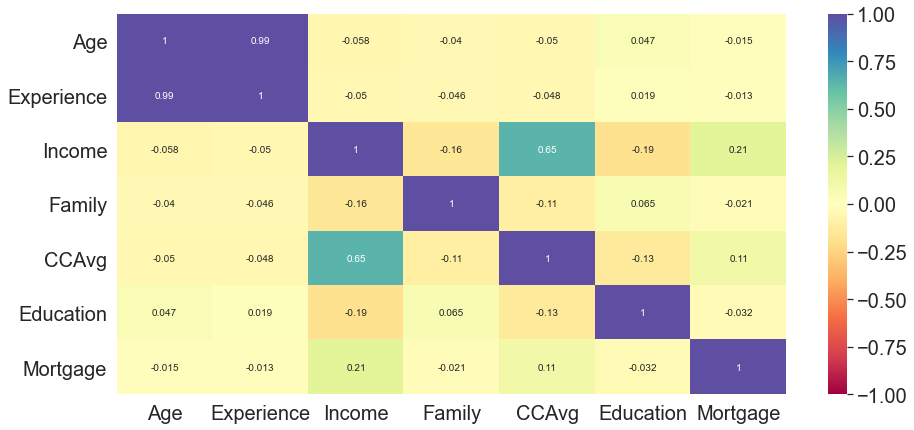

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(15, 7))
# Choose only the numeric columns, other columns even though are treated as numeric are actually boolean
sns.heatmap(
    cmp_df[
        ["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage",]
    ].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="Spectral",
)
plt.show()

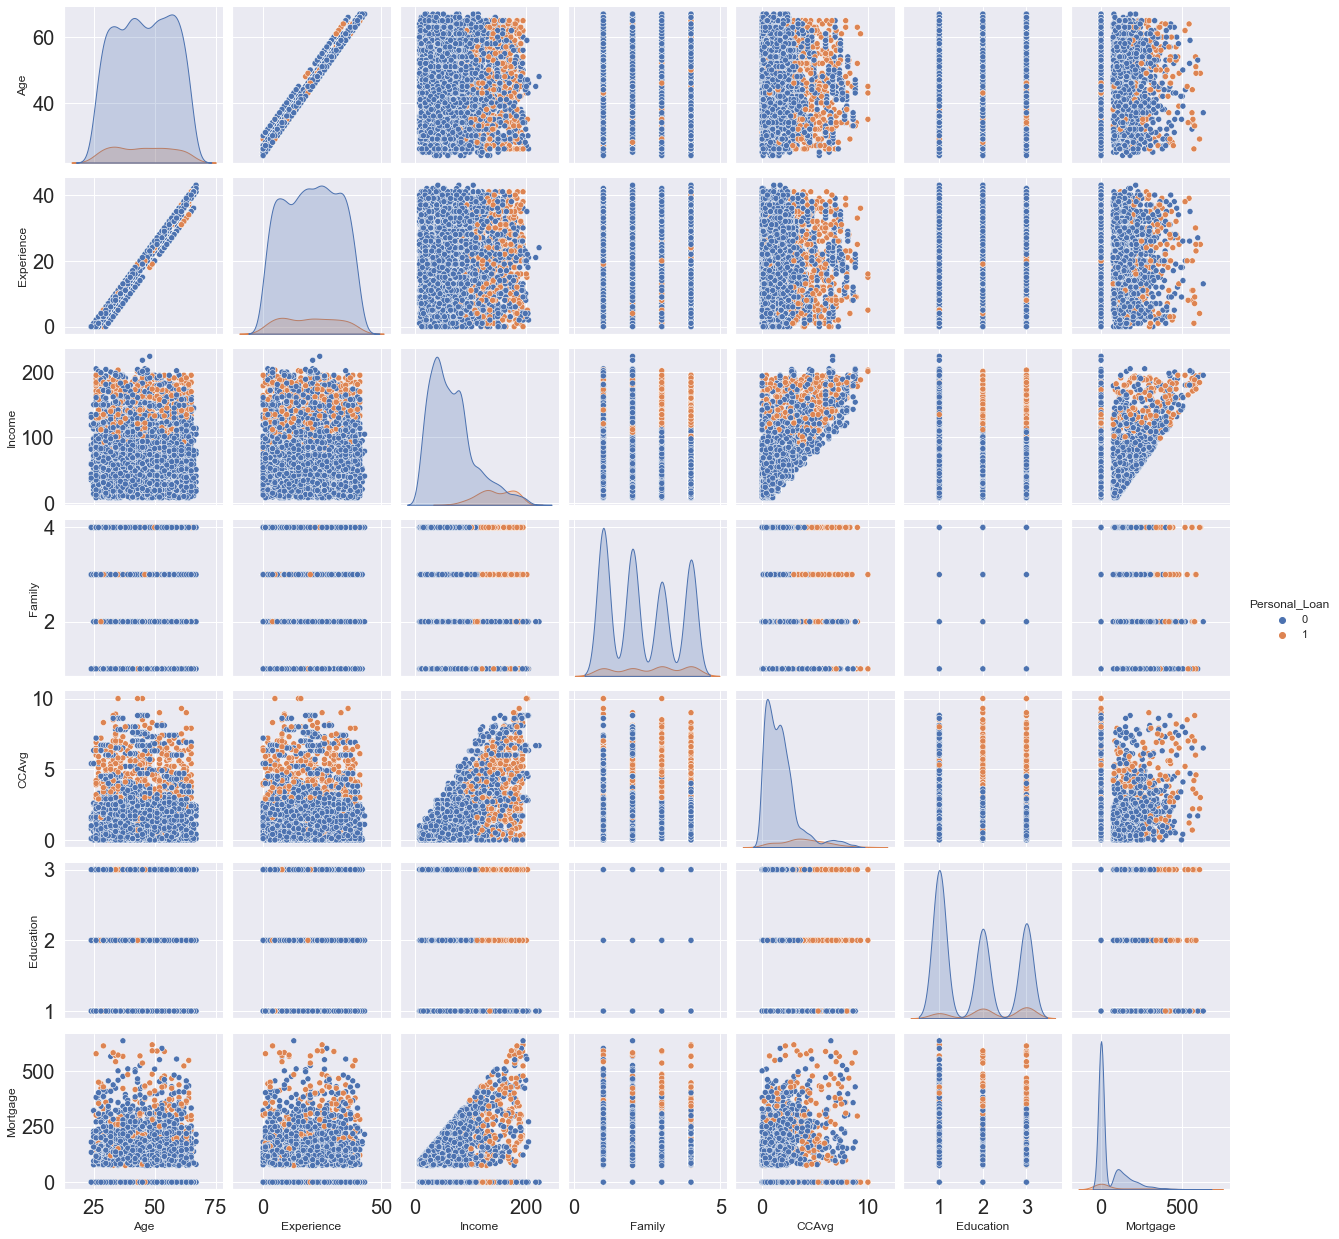

<IPython.core.display.Javascript object>

In [28]:
sns.pairplot(
    data=cmp_df[
        [
            "Age",
            "Experience",
            "Income",
            "Family",
            "CCAvg",
            "Education",
            "Mortgage",
            "Personal_Loan",
        ]
    ],
    hue="Personal_Loan",
)
plt.show()

##### Observations:
* Age and Experience are strongly correlated. We should drop one of these two columns.
* Income and CCAvg columns too are correlated but not strongly enough to be dropped
* Income and Mortgage columns are weakly correlated
* Mortgage and CCAvg columns too are weakly correlated

##### Pair-plot shows some interesting patterns
* Most customers who accepted personal loan have higher income levels and have 3 or 4 family members
* Most customers who accepted personal loan have higher income levels and have education level 2 or 3
* Most customers who accepted personal loan have higher CCAvg levels and have education level 2 or 3
* Most customers who have higher levels of CCAvg and Higher levels of Mortgage accepted personal loan

From the heatmap it can be seen that Age and Experience are very highly correlated. lets dro Experience

In [29]:
# Drop experience as it is strongly correlated to Age
cmp_df.drop("Experience", axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### County and Personal_Loan

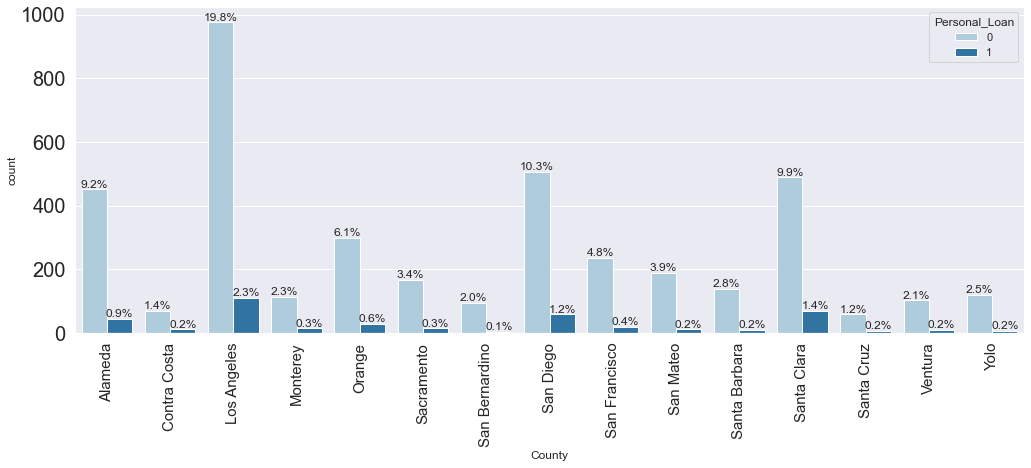

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(cmp_df, "County", perc=True, n=15, hue="Personal_Loan")

Personal_Loan       0    1   All
County                          
All              4438  477  4915
Los Angeles       975  111  1086
Santa Clara       489   71   560
San Diego         506   59   565
Alameda           451   44   495
Orange            300   30   330
San Francisco     236   19   255
Monterey          113   15   128
Sacramento        167   15   182
Contra Costa       71   12    83
San Mateo         190   12   202
Ventura           103   11   114
Santa Barbara     140   11   151
Santa Cruz         59    8    67
Yolo              121    8   129
Kern               46    7    53
Sonoma             22    6    28
Marin              46    6    52
Riverside          49    6    55
San Luis Obispo    28    5    33
Solano             30    3    33
San Bernardino     96    3    99
Shasta             15    3    18
Humboldt           30    2    32
Butte              17    2    19
Placer             22    2    24
Fresno             24    2    26
San Joaquin        12    1    13
El Dorado 

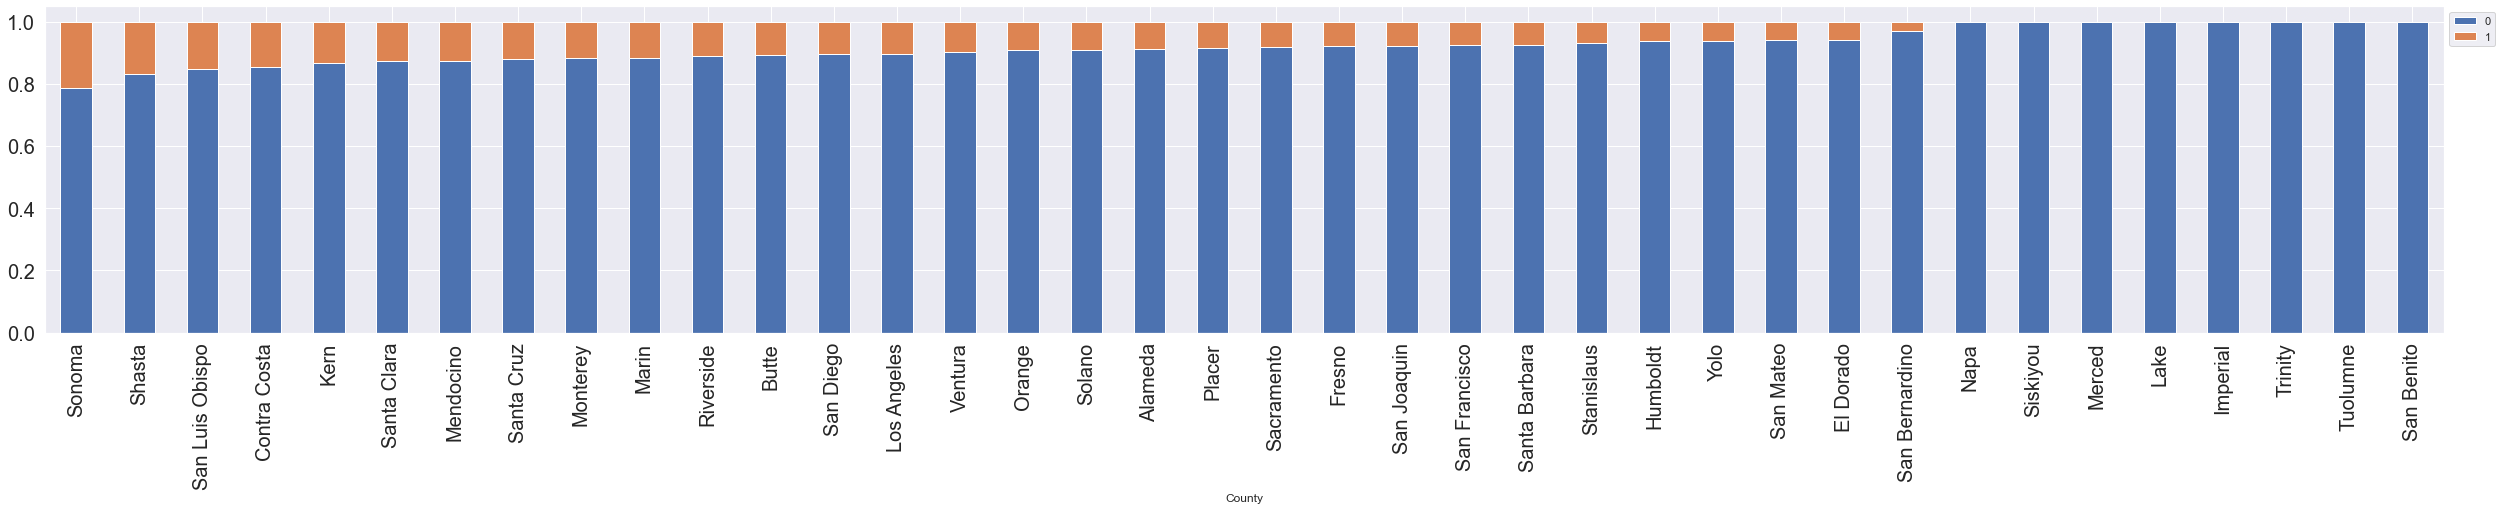

<IPython.core.display.Javascript object>

In [31]:
stacked_barplot(cmp_df, "County", "Personal_Loan")

#### Family and Personal_Loan

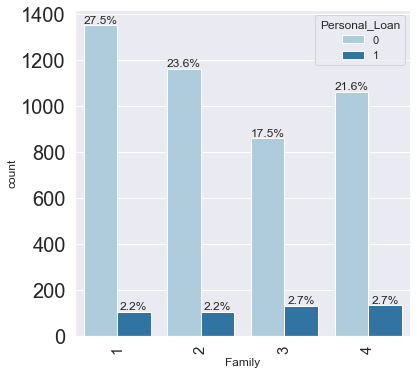

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(cmp_df, "Family", perc=True, hue="Personal_Loan")

Personal_Loan     0    1   All
Family                        
All            4438  477  4915
4              1063  133  1196
3               861  132   993
1              1352  106  1458
2              1162  106  1268
---------------------------------------------------------------------------


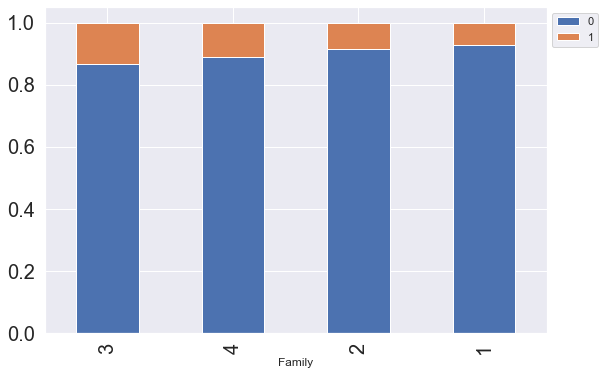

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(cmp_df, "Family", "Personal_Loan")

##### Observations:
Family column values look evenly distributed and the data in this column looks clean

#### Education and Personal_loan
Let's look at the distribution of the education column and relation to personal loan

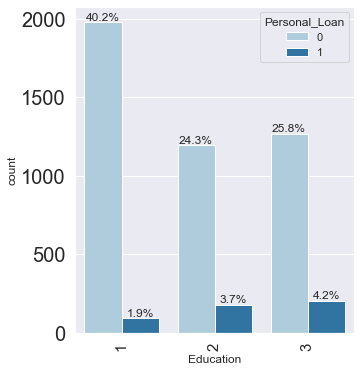

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(cmp_df, "Education", perc=True, hue="Personal_Loan")

Personal_Loan     0    1   All
Education                     
All            4438  477  4915
3              1267  204  1471
2              1194  180  1374
1              1977   93  2070
---------------------------------------------------------------------------


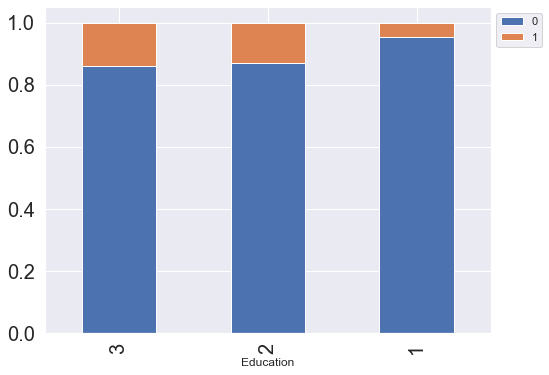

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(cmp_df, "Education", "Personal_Loan")

##### Observations:
* Most of the customers are Undergraduate
* More Customers with education levels 2 and 3 have accepted Personal Loan

#### Other Boolean columns
Securities_Account, CD_Account, Online and CreditCard columns are boolean columns with either 0 or 1 values.
Lets take a look at the distribution of each of these columns and their relations to Personal_Loan

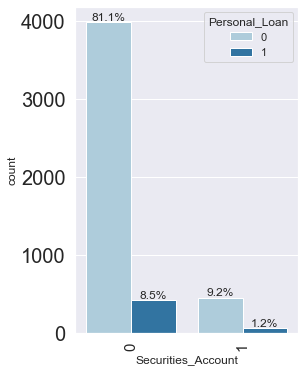

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(cmp_df, "Securities_Account", perc=True, hue="Personal_Loan")

Personal_Loan          0    1   All
Securities_Account                 
All                 4438  477  4915
0                   3986  417  4403
1                    452   60   512
---------------------------------------------------------------------------


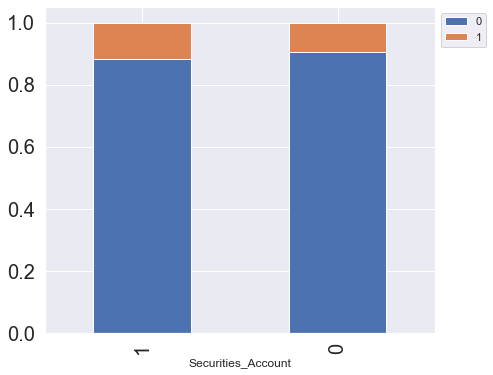

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(cmp_df, "Securities_Account", "Personal_Loan")

* Most customers do not have Securities account
* More number of customers who do not have securities account accepted personal loan but that could simply be because there are more such customers

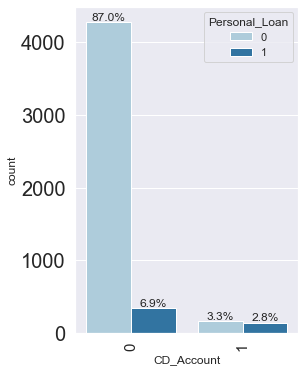

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(cmp_df, "CD_Account", perc=True, hue="Personal_Loan")

Personal_Loan     0    1   All
CD_Account                    
All            4438  477  4915
0              4276  337  4613
1               162  140   302
---------------------------------------------------------------------------


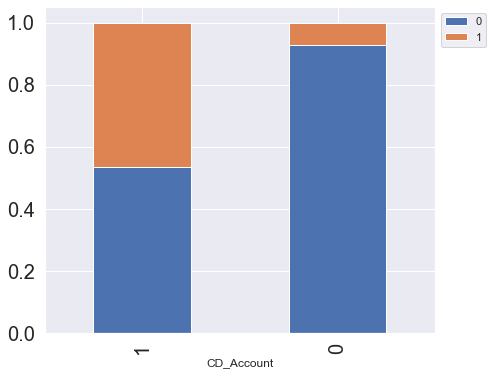

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(cmp_df, "CD_Account", "Personal_Loan")

* Most customers do not have CD_Account
* A higher percentage of the customers with CD account accepted personal loan 

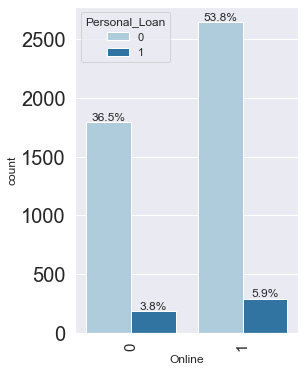

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(cmp_df, "Online", perc=True, hue="Personal_Loan")

Personal_Loan     0    1   All
Online                        
All            4438  477  4915
1              2644  291  2935
0              1794  186  1980
---------------------------------------------------------------------------


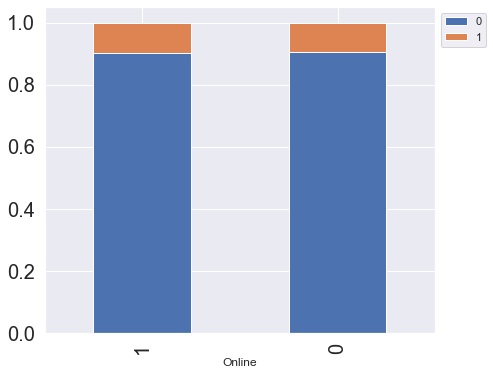

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(cmp_df, "Online", "Personal_Loan")

* More customers use online banking

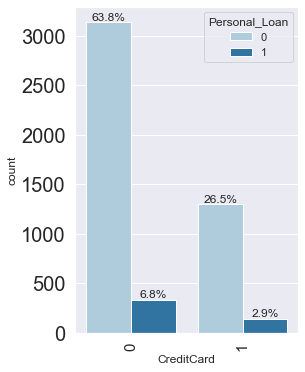

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(cmp_df, "CreditCard", perc=True, hue="Personal_Loan")

Personal_Loan     0    1   All
CreditCard                    
All            4438  477  4915
0              3137  335  3472
1              1301  142  1443
---------------------------------------------------------------------------


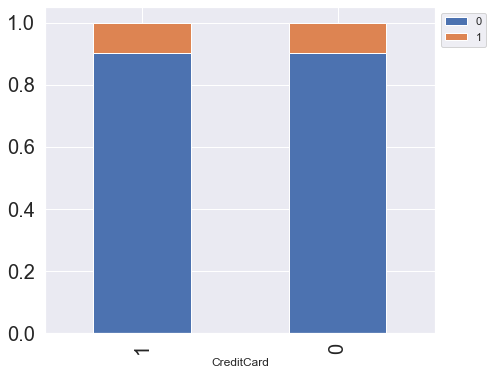

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(cmp_df, "CreditCard", "Personal_Loan")

Most customers do not have other bank credit cards

### Dummies from county
Lets get dummies for the county column

In [44]:
# Now lets get dummies for the county
cmp_df = pd.get_dummies(
    cmp_df,
    columns=[
        "County",
        "Family",
        "Education",
    ],
    drop_first=True,
)

<IPython.core.display.Javascript object>

In [45]:
# lets take a look at the shape after adding dummies
cmp_df.shape

(4915, 51)

<IPython.core.display.Javascript object>

In [46]:
cmp_df.head()

,Age,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County_Butte,County_Contra Costa,County_El Dorado,County_Fresno,County_Humboldt,County_Imperial,County_Kern,County_Lake,County_Los Angeles,County_Marin,County_Mendocino,County_Merced,County_Monterey,County_Napa,County_Orange,County_Placer,County_Riverside,County_Sacramento,County_San Benito,County_San Bernardino,County_San Diego,County_San Francisco,County_San Joaquin,County_San Luis Obispo,County_San Mateo,County_Santa Barbara,County_Santa Clara,County_Santa Cruz,County_Shasta,County_Siskiyou,County_Solano,County_Sonoma,County_Stanislaus,County_Trinity,County_Tuolumne,County_Ventura,County_Yolo,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,49,1.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,45,34,1.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,39,11,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,100,2.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,35,45,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


<IPython.core.display.Javascript object>

# Split data for Training and Test

In [47]:
# Separate out the target variable form independent variables
X = cmp_df.drop("Personal_Loan", axis=1)
y = cmp_df["Personal_Loan"]

# split train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

Let's check the distribution of data in Test and Train sets

In [48]:
# check the spilt of data
print(f"{(len(X_train) / len(cmp_df.index)) * 100:0.2f}% data is in training set")
print(f"{(len(X_test) / len(cmp_df.index)) * 100:0.2f}% data is in test set")

# check the distribution of the target variable in train and test data
print("")
print(
    "Training Personal_Loan 1 Values    : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 1]),
        (len(y_train[y_train[:] == 1]) / len(y_train)) * 100,
    )
)
print(
    "Training Personal_Loan 0 Values   : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 0]),
        (len(y_train[y_train[:] == 0]) / len(y_train)) * 100,
    )
)
print("")
print(
    "Test Personal_Loan 1 Values        : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100
    )
)
print(
    "Test Personal_Loan 0 Values       : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100
    )
)
print("")

69.99% data is in training set
30.01% data is in test set

Training Personal_Loan 1 Values    : 345 (10.03%)
Training Personal_Loan 0 Values   : 3095 (89.97%)

Test Personal_Loan 1 Values        : 132 (8.95%)
Test Personal_Loan 0 Values       : 1343 (91.05%)



<IPython.core.display.Javascript object>

# Model evaluation criterion
Before we start building models, it is important to identify what criteria will be used to evaluate the performance of the models and to choose the final model.

##### Please note that the model we are building is trying to predict if a customer will purchase the loan or not. This is not to be confused with weather the customer will repay the loan or not.

### Our model can make wrong predictions in one of the following 2 ways
1. Wrongly predict that a customer will purchase a loan - when the customer actually does not purchase
2. Wrongly predict that a customer will not purchase a loan - When the customer actually purchases

#### Of the above two, case# 2 is more harmful in this project as it will mean a missed sells opportunity.
To Reduce this loss we will have to reduce the False -ves. __Which means we will have to Maximize Recall__

We will be building Logistic regression models and Decision Tree Models and pick the best

# Logistic Regression Models

In [49]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [50]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Fit the Logistic Regression Model

In [51]:
# Fit the model on train
log_reg_model = LogisticRegression(solver="liblinear", random_state=1)
log_reg_model.fit(X_train, y_train)
# predict on test
y_predict = log_reg_model.predict(X_test)


coef_df = pd.DataFrame(log_reg_model.coef_, columns=X_train.columns)
coef_df["intercept"] = log_reg_model.intercept_
print(coef_df.T)

                               0
Age                    -0.015535
Income                  0.048442
CCAvg                   0.091586
Mortgage                0.000345
Securities_Account     -0.725486
CD_Account              2.905664
Online                 -0.632176
CreditCard             -0.785350
County_Butte            0.681591
County_Contra Costa     0.120673
County_El Dorado       -0.251197
County_Fresno          -0.371357
County_Humboldt        -0.196679
County_Imperial        -0.014288
County_Kern             0.437326
County_Lake             0.000000
County_Los Angeles     -0.073078
County_Marin            0.089054
County_Mendocino       -0.204302
County_Merced          -0.081427
County_Monterey        -0.046521
County_Napa            -0.027347
County_Orange          -0.608004
County_Placer           0.039395
County_Riverside        0.688267
County_Sacramento      -0.150922
County_San Benito      -0.220295
County_San Bernardino  -1.107971
County_San Diego       -0.016087
County_San

<IPython.core.display.Javascript object>

In [52]:
model_score = log_reg_model.score(X_test, y_test)
print(model_score)

0.9606779661016949


<IPython.core.display.Javascript object>

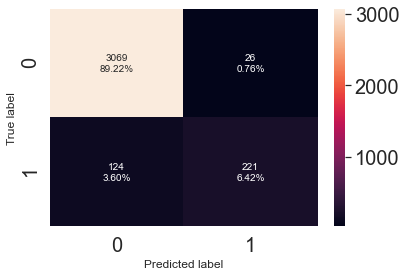

<IPython.core.display.Javascript object>

In [53]:
confusion_matrix_sklearn_with_threshold(log_reg_model, X_train, y_train)

In [54]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    log_reg_model, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.956395,0.64058,0.894737,0.746622


<IPython.core.display.Javascript object>

#### Test the Base Logistic Regression Model

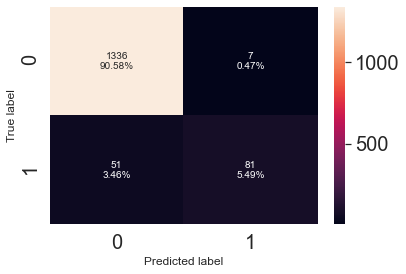

<IPython.core.display.Javascript object>

In [55]:
# creating confusion matrix on the Test data
confusion_matrix_sklearn_with_threshold(log_reg_model, X_test, y_test)

In [56]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    log_reg_model, X_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.960678,0.613636,0.920455,0.736364


<IPython.core.display.Javascript object>

#### Observations on the base logistic regression model
1. Base Logistic Regression Model is highly accurate
2. Recall is low for the base logistic regression model

### ROC-AUC

##### ROC-AUC on training set

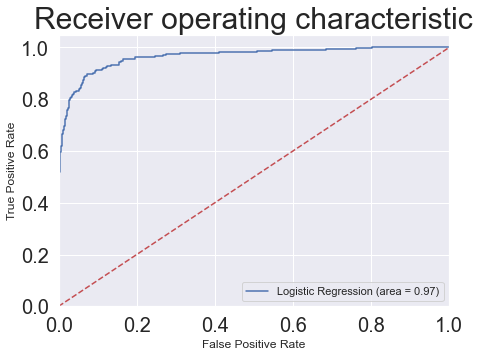

<IPython.core.display.Javascript object>

In [57]:
logit_roc_auc_train = roc_auc_score(y_train, log_reg_model.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, log_reg_model.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

##### ROC-AUC on test data

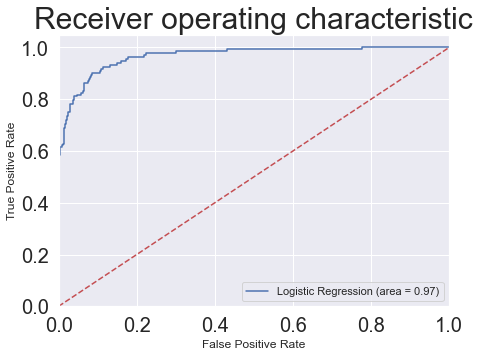

<IPython.core.display.Javascript object>

In [58]:
logit_roc_auc_test = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Logistic Regression Model Performance Improvement

##### Optimal threshold using AUC-ROC curve

In [59]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, log_reg_model.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.16110961186373537


<IPython.core.display.Javascript object>

#### Optimal threshold using ROC AUC curve is 0.11980839052783294

##### Checking model performance on training set

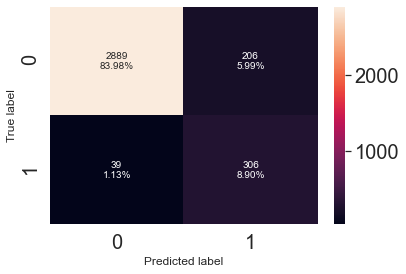

<IPython.core.display.Javascript object>

In [60]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    log_reg_model, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [61]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    log_reg_model, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.928779,0.886957,0.597656,0.714119


<IPython.core.display.Javascript object>

##### Checking model performance on test set

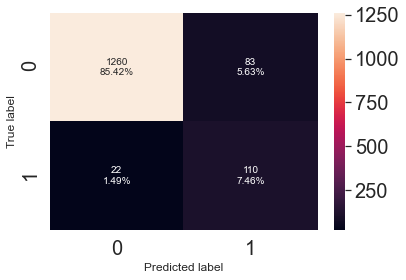

<IPython.core.display.Javascript object>

In [62]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    log_reg_model, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [63]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    log_reg_model, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.928814,0.833333,0.569948,0.676923


<IPython.core.display.Javascript object>

#### Observations
1. Logistic Regression Model with the threshold obtained from the ROC-AUC curve is providing a much better recall without loosing a lot on the Accuracy and f1 score
2. Optimal threshold using ROC AUC curve is 0.11980839052783294
3. Recall on test data with optimal threshold is 0.878788

#### Model Performance Summary

In [64]:
# training performance comparison

models_train_comp_df = pd.concat(
    [log_reg_model_train_perf.T, log_reg_model_train_perf_threshold_auc_roc.T,], axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.12 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.12 Threshold
Accuracy,0.956395,0.928779
Recall,0.640580,0.886957
Precision,0.894737,0.597656
F1,0.746622,0.714119


<IPython.core.display.Javascript object>

In [65]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [log_reg_model_test_perf.T, log_reg_model_test_perf_threshold_auc_roc.T,], axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.12 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.12 Threshold
Accuracy,0.960678,0.928814
Recall,0.613636,0.833333
Precision,0.920455,0.569948
F1,0.736364,0.676923


<IPython.core.display.Javascript object>

# Decision Tree Models
We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.

In [66]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [67]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [68]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

##### Checking model performance on training set

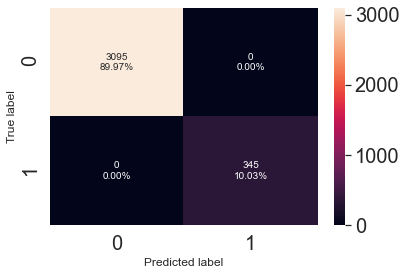

<IPython.core.display.Javascript object>

In [69]:
confusion_matrix_sklearn(dTree, X_train, y_train)

In [70]:
decision_tree_perf_train = get_recall_score(dTree, X_train, y_train)
print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

##### Checking model performance on test set

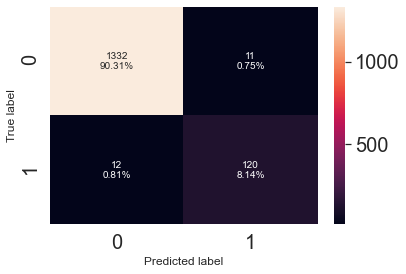

<IPython.core.display.Javascript object>

In [71]:
confusion_matrix_sklearn(dTree, X_test, y_test)

In [72]:
decision_tree_perf_test = get_recall_score(dTree, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.9090909090909091


<IPython.core.display.Javascript object>

##### Visualize the Tree

In [73]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

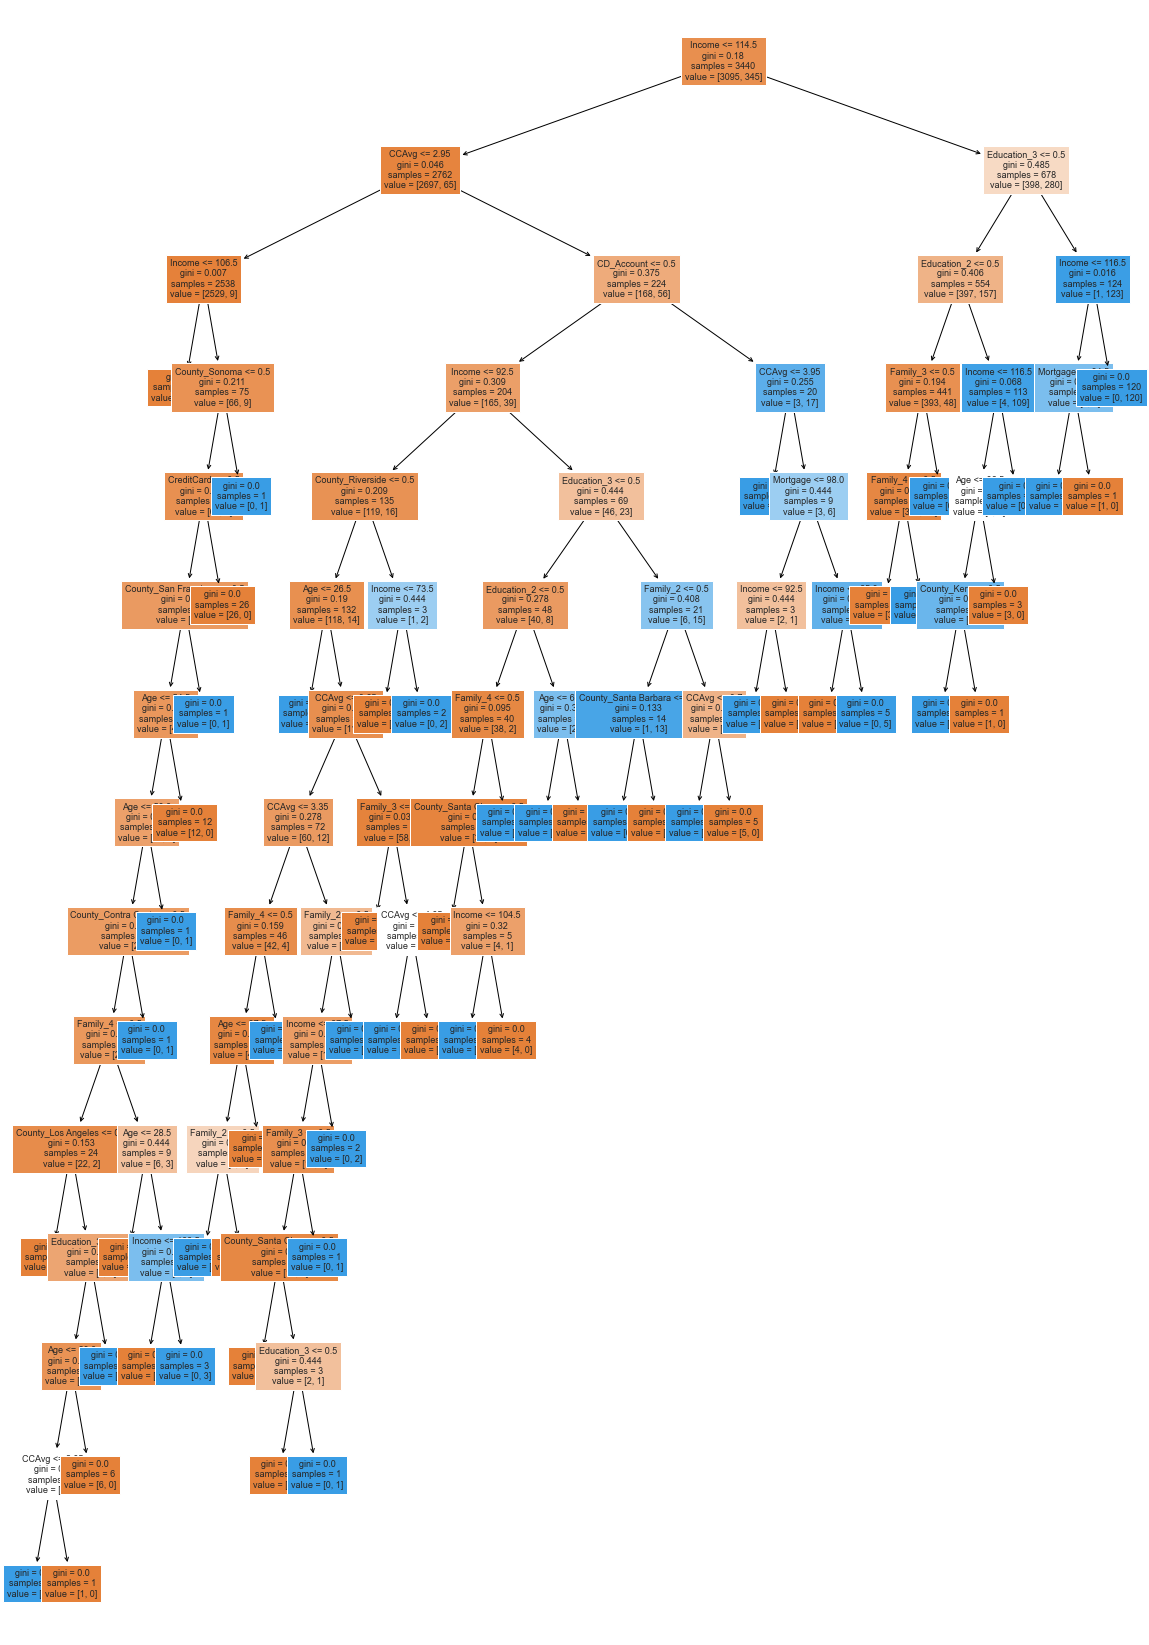

<IPython.core.display.Javascript object>

In [74]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

##### Observations:
1. The Base Decision Tree Model is getting a recall score of 1 on training set and 0.87 on the test set
2. This is very complex tree

##### Feature Importance for the tree

In [75]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income                  0.299641
Education_2             0.222745
Education_3             0.182329
Family_3                0.083722
Family_4                0.068304
CCAvg                   0.054823
CD_Account              0.025470
Age                     0.022086
Family_2                0.017379
Mortgage                0.004027
County_Santa Barbara    0.002992
County_Riverside        0.002970
County_Kern             0.002577
County_Sonoma           0.002529
County_San Francisco    0.002285
County_Contra Costa     0.002251
CreditCard              0.001509
County_Santa Clara      0.001466
County_Los Angeles      0.000895
County_Yolo             0.000000
County_Ventura          0.000000
County_Tuolumne         0.000000
County_San Mateo        0.000000
County_Stanislaus       0.000000
Online                  0.000000
County_Solano           0.000000
County_Siskiyou         0.000000
Securities_Account      0.000000
County_Shasta           0.000000
County_San

<IPython.core.display.Javascript object>

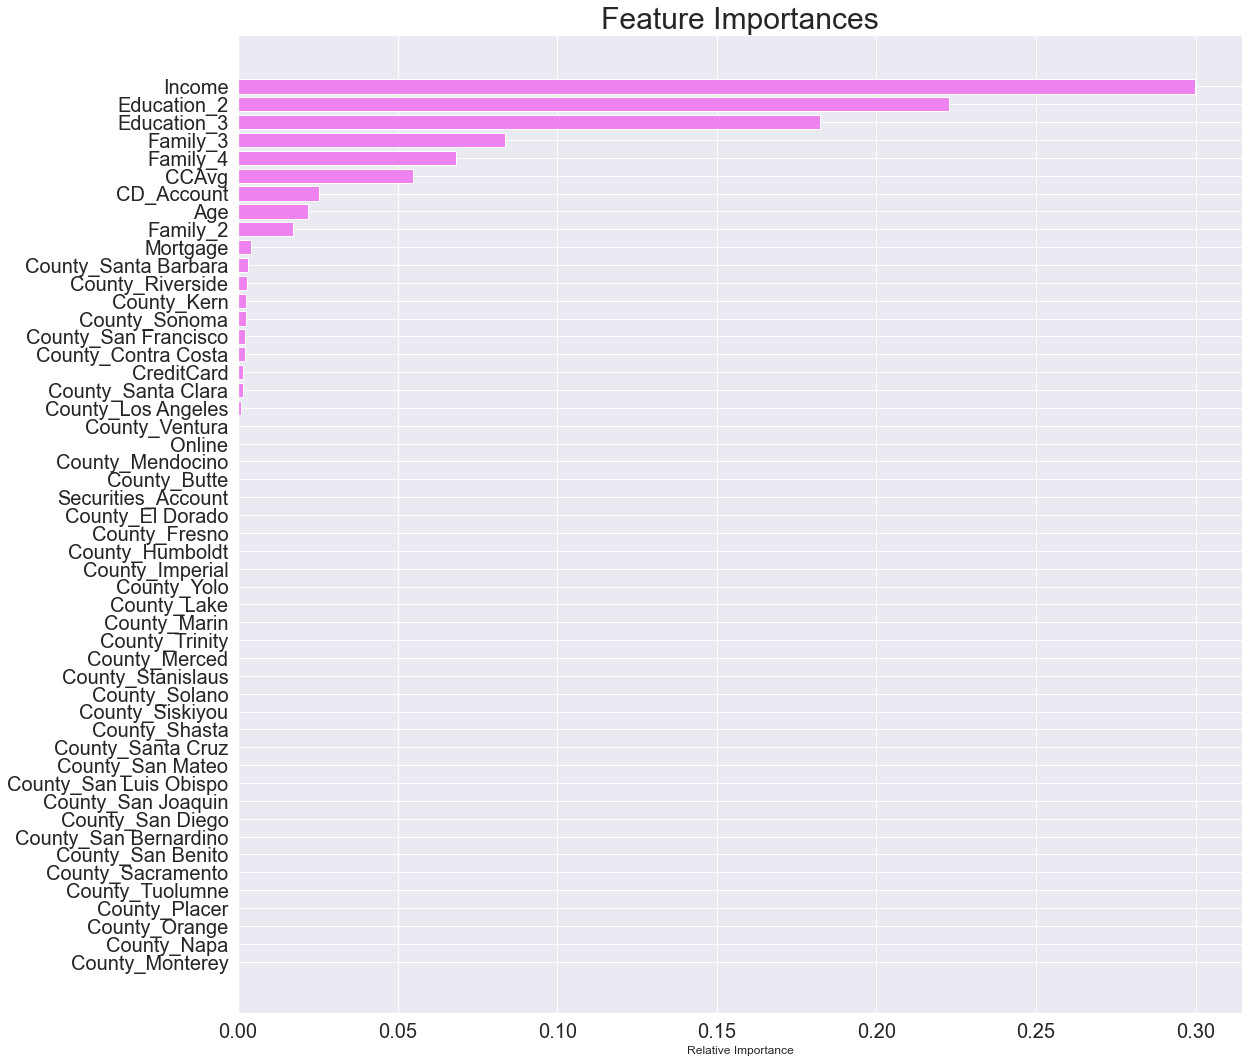

<IPython.core.display.Javascript object>

In [76]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18, 18))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##### Observations:
1. According the decision tree Education and Income are the two most important features
2. Most of the features have importance 0

### Reducing over fitting

##### GridSearch for Hyperparameter tuning

In [77]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1)

<IPython.core.display.Javascript object>

##### Checking performance on training set

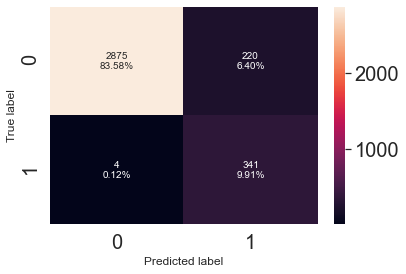

<IPython.core.display.Javascript object>

In [78]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [79]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9884057971014493


<IPython.core.display.Javascript object>

##### Checking performance on test set

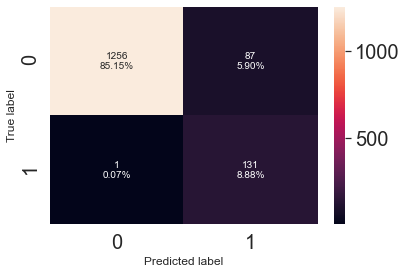

<IPython.core.display.Javascript object>

In [80]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [81]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9924242424242424


<IPython.core.display.Javascript object>

##### The model is giving a generalized result after Hyperparameter tuning 

##### Visualize the tuned Decision Tree

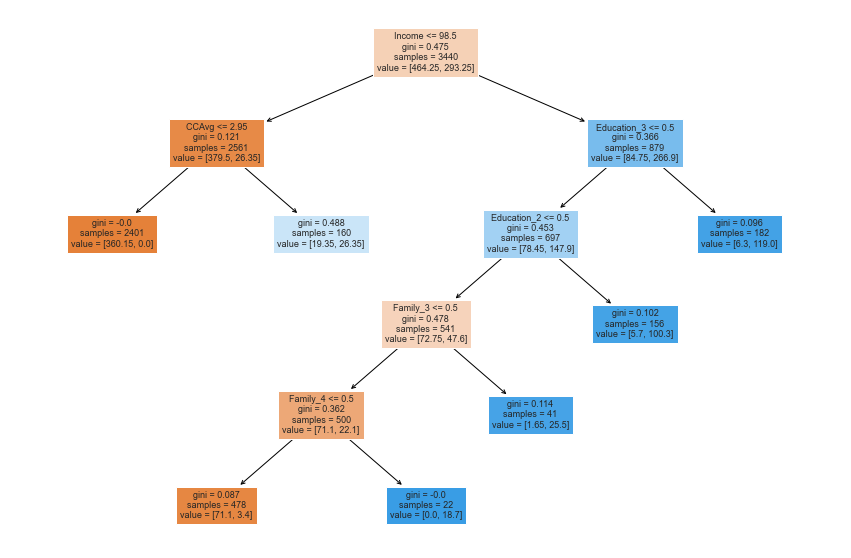

<IPython.core.display.Javascript object>

In [82]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [83]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [360.15, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [19.35, 26.35] class: 1
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [71.10, 3.40] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.00, 18.70] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.65, 25.50] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [5.70, 100.30] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.30, 119.00] class: 1



<IPython.core.display.Javascript object>

In [84]:
# Lets look at the fieatures with importance for the perf tuned tree

imp_df = pd.DataFrame(
    estimator.feature_importances_, columns=["Imp"], index=X_train.columns
)
print(imp_df[imp_df["Imp"] > 0].sort_values(by="Imp", ascending=False))



                  Imp
Income       0.595557
Education_2  0.112163
Family_4     0.089338
CCAvg        0.088468
Family_3     0.068009
Education_3  0.046466


<IPython.core.display.Javascript object>

##### Only 6 features are used in the performance tuned tree

### Cost Complexity Pruning

#### Total impurity of leaves vs effective alphas of pruned tree

In [85]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

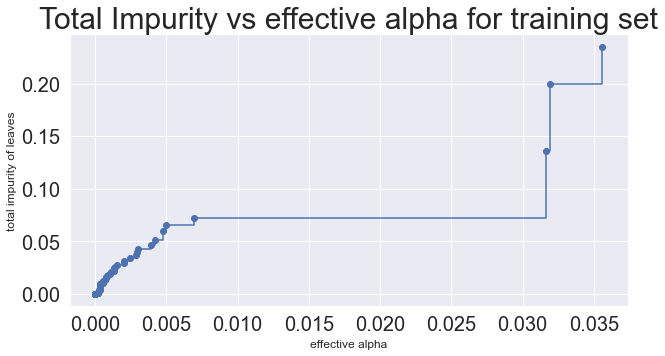

<IPython.core.display.Javascript object>

In [86]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [87]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2396319665238025


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

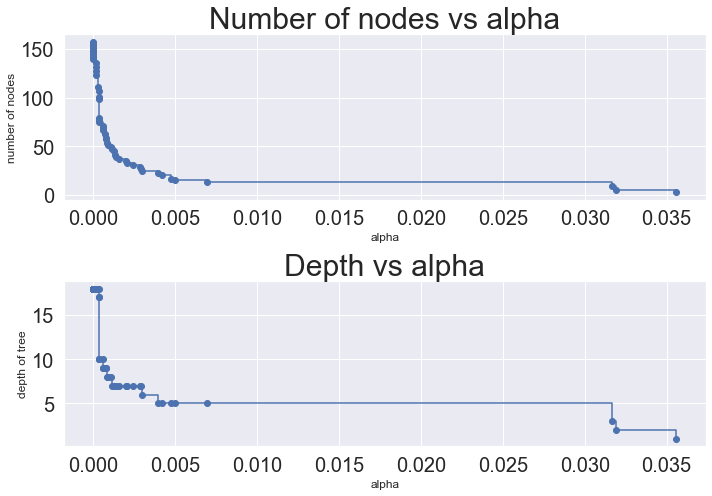

<IPython.core.display.Javascript object>

In [88]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [89]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)


<IPython.core.display.Javascript object>

In [90]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [91]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

In [92]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

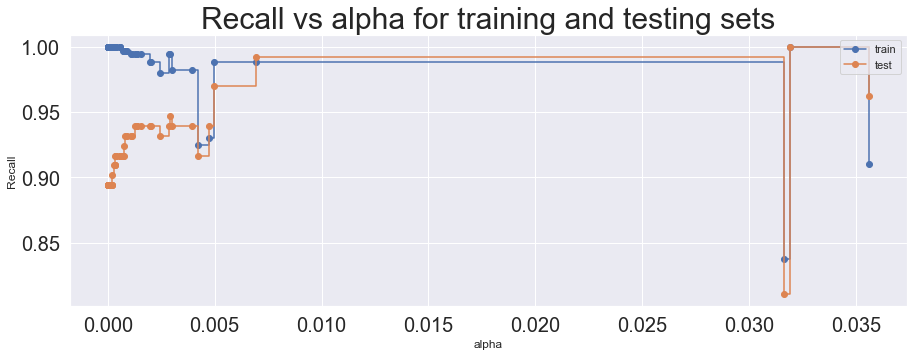

<IPython.core.display.Javascript object>

In [93]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#### Maximum value of Recall is at 0.032 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.007 retaining information and getting higher recall.

In [94]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.03191336736356977,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

##### Creating model with 0.007 ccp_alpha

In [95]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.007, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.007, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

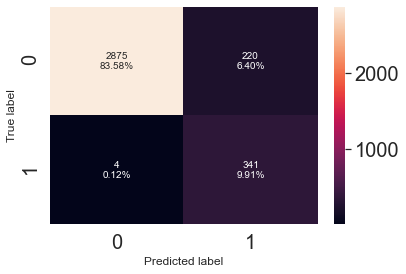

<IPython.core.display.Javascript object>

In [96]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [97]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9884057971014493


<IPython.core.display.Javascript object>

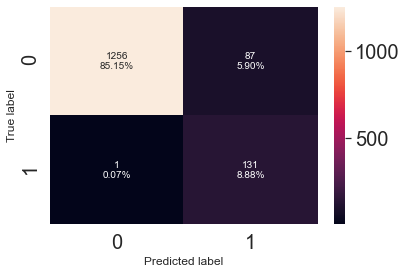

<IPython.core.display.Javascript object>

In [98]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [99]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9924242424242424


<IPython.core.display.Javascript object>

##### Observations
* The results have improved from the initial model.
* The performance is comparable to the hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.

##### Visualizing the Decision Tree

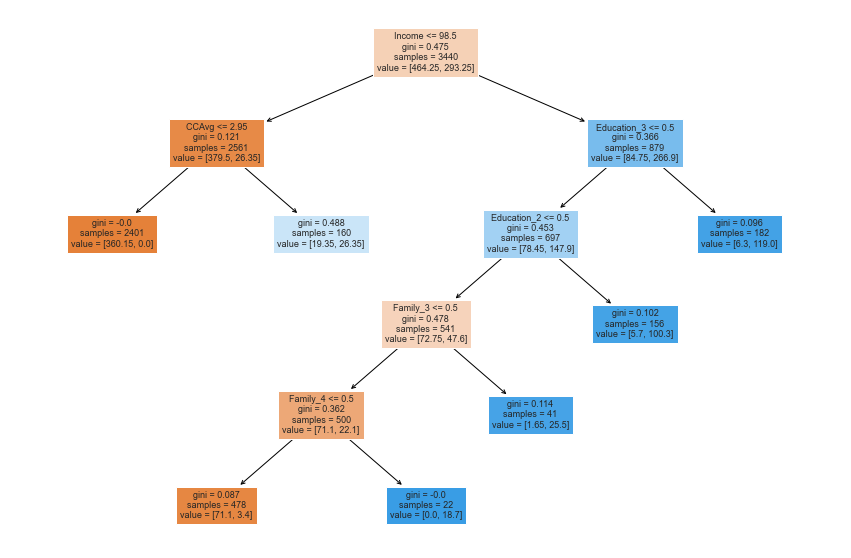

<IPython.core.display.Javascript object>

In [100]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [101]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [360.15, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [19.35, 26.35] class: 1
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [71.10, 3.40] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.00, 18.70] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.65, 25.50] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [5.70, 100.30] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.30, 119.00] class: 1



<IPython.core.display.Javascript object>

#### Feature Importance

In [102]:
imp_df_best_2 = pd.DataFrame(
    best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
)
print(imp_df[imp_df["Imp"] > 0].sort_values(by="Imp", ascending=False))

                  Imp
Income       0.595557
Education_2  0.112163
Family_4     0.089338
CCAvg        0.088468
Family_3     0.068009
Education_3  0.046466


<IPython.core.display.Javascript object>

### Comparing all the decision tree models

In [103]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,0.988406
2,0.988406


<IPython.core.display.Javascript object>

In [104]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.909091
1,0.992424
2,0.992424


<IPython.core.display.Javascript object>

# Conclusion
* All the decision Tree Models had performance better than the best Logistic regression model
* estimator, __decision tree model created with GridSearch for Hyperparameter tuning provided the best recall__
* estimator, model had __recall score of 0.997101 on Training data and 0.977273 on test data__
*  __Income, CCAvg, Education, Family, CD_Account, County_Santa Barbara__ are the only important features used in the estimator model

# Recommendations
* AllLife Bank should use the Decision Tree model created with GridSearch for Hyperparameter Tuning to predict if a customer will buy a personal loan or not
* Based on the selected model, AllLife Bank should mainly target customers with income lower than 98.5k as the customers with income more than 98.5K has a very low probability of accepting the personal loan
* A customer whose income is between 98.5K and 114.5K and has Graduate or Advance/Professional level of education is most likely to accept the personal loan